6610402230 ศิริสุข ทานธรรม

# Assignment 6: Assignment 6: Deep Learning

In [44]:
import os, random, numpy as np
import tensorflow as tf

seed_value = 7777
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
os.environ['PYTHONHASHSEED'] = str(seed_value)

In [45]:
import pandas as pd
import numpy as np

In [46]:
data =  pd.read_csv("FastFood_Opinion.csv")
data

,class,message
0,0,11.30 น. ไปที่สาขาในปั๊มคาลเท็กซ์ ประชานุกูล ซ...
1,0,BK ทุกสาขาบริการดี โดยเฉพาะอย่างยิ่งเอมโพเรียม...
2,0,Burger King สาขา The Bright พระราม 2 บริการห่ว...
3,0,Burger King สาขาปั้ม ป.ต.ท.บ้านพร อ.ถลาง เมื่อ...
4,0,chicken strip ชิ้นเล็กมาก เทียบกับป้ายโฆษณาบนโต๊ะ
...,...,...
637,1,ช่วงโปรฯ คุณภาพเกินราคาคะ
638,1,อร่อยมาก ราคาโอเครเลยค่ะ
639,1,อาหารอร่อยมากคะ
640,1,คุณภาพและการบริการระดับ 5 ดาว


In [47]:
print(data.shape)
print(data["class"].unique())

(642, 2)
[0 1]


In [48]:
print(data.shape,data)

(642, 2)      class                                            message
0        0  11.30 น. ไปที่สาขาในปั๊มคาลเท็กซ์ ประชานุกูล ซ...
1        0  BK ทุกสาขาบริการดี โดยเฉพาะอย่างยิ่งเอมโพเรียม...
2        0  Burger King สาขา The Bright พระราม 2 บริการห่ว...
3        0  Burger King สาขาปั้ม ป.ต.ท.บ้านพร อ.ถลาง เมื่อ...
4        0  chicken strip ชิ้นเล็กมาก เทียบกับป้ายโฆษณาบนโต๊ะ
..     ...                                                ...
637      1                          ช่วงโปรฯ คุณภาพเกินราคาคะ
638      1                           อร่อยมาก ราคาโอเครเลยค่ะ
639      1                                    อาหารอร่อยมากคะ
640      1                      คุณภาพและการบริการระดับ 5 ดาว
641      1                                 อาหารอร่อยมากๆ ค่ะ

[642 rows x 2 columns]


In [49]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
print(data.shape)
tokenizer.fit_on_texts(data["message"])
tokenizer.word_index

(642, 2)


{'1': 1,
 'พนง': 2,
 '2': 3,
 '3': 4,
 'สาขา': 5,
 'burger': 6,
 'king': 7,
 'น': 8,
 'ค่ะ': 9,
 'sizzler': 10,
 'นาที': 11,
 '5': 12,
 '4': 13,
 'ชม': 14,
 'อร่อย': 15,
 'ชิ้น': 16,
 'the': 17,
 'ๆ': 18,
 '10': 19,
 'บริการดี': 20,
 '30': 21,
 'chicken': 22,
 'คือ': 23,
 'และ': 24,
 '60': 25,
 'central': 26,
 '7': 27,
 'อร่อยมาก': 28,
 '15': 29,
 'บาท': 30,
 'อาหารอร่อย': 31,
 '11': 32,
 'คน': 33,
 'เวลา': 34,
 'whopper': 35,
 '12': 36,
 '19': 37,
 '6': 38,
 'บริการแย่มาก': 39,
 'pork': 40,
 'วันที่': 41,
 'ทุ่ม': 42,
 'center': 43,
 'pizza': 44,
 'bk': 45,
 'ผจก': 46,
 'สั่ง': 47,
 'ชุด': 48,
 'delivery': 49,
 'รอบ': 50,
 'service': 51,
 'mind': 52,
 '00': 53,
 'สะอาด': 54,
 'คืออะไร': 55,
 'บริการดีมาก': 56,
 '1112': 57,
 'เสียความรู้สึกมาก': 58,
 'พระราม': 59,
 'ที่': 60,
 'esso': 61,
 'กม': 62,
 'ไม่มี': 63,
 'ปล': 64,
 '40': 65,
 'แย่': 66,
 '9': 67,
 'ขอบคุณค่ะ': 68,
 'มี': 69,
 '2560': 70,
 'a': 71,
 '20': 72,
 'ถาด': 73,
 'ไป': 74,
 '50': 75,
 'bbq': 76,
 'ที่สาขา': 77,
 'chee

In [50]:
from tensorflow.keras.utils import to_categorical
print("Unique lables = ", data["class"].unique())
y=to_categorical(data["class"])
print(y)
print(y[0],"-->",np.argmax(y[0]))
print(y[100],"-->",np.argmax(y[100]))

Unique lables =  [0 1]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
[1. 0.] --> 0
[0. 1.] --> 1


In [51]:
from keras.utils import pad_sequences
text_sequences = tokenizer.texts_to_sequences(data["message"])
text_sequences

[[32, 21, 8, 346, 156, 347, 348, 3, 16, 349, 350, 351, 352],
 [45,
  353,
  354,
  355,
  356,
  357,
  358,
  359,
  360,
  361,
  362,
  363,
  364,
  365,
  18,
  366,
  367,
  368,
  369,
  370,
  58,
  97,
  46,
  24,
  2],
 [6,
  7,
  5,
  17,
  98,
  59,
  3,
  371,
  372,
  4,
  33,
  373,
  374,
  375,
  376,
  377,
  378,
  379,
  380,
  74,
  381,
  382,
  383,
  384,
  385,
  1,
  386,
  387,
  388,
  21,
  11,
  389,
  3,
  390,
  1,
  391,
  47,
  3,
  48,
  392,
  393,
  394,
  395,
  396,
  4,
  397,
  398,
  399,
  400,
  401,
  402,
  403,
  404,
  405,
  406,
  6,
  7,
  407,
  408],
 [6,
  7,
  409,
  410,
  411,
  412,
  413,
  414,
  415,
  416,
  417,
  60,
  13,
  418,
  157,
  419,
  420,
  421,
  422,
  423,
  424,
  425,
  426,
  427,
  428,
  429,
  430,
  431,
  24,
  432,
  433],
 [22, 158, 434, 435],
 [49, 436, 437, 438, 439, 440, 99, 49, 441],
 [442, 443, 444, 445, 446, 447],
 [448, 449, 450, 451, 452, 453, 75, 454, 455, 456, 457, 458, 459],
 [460, 461, 

In [52]:
maxlen = max([len(s) for s in text_sequences])
print("max sentense's length = " , maxlen)
x = pad_sequences(text_sequences, maxlen=maxlen, padding="post")
print(x.shape)

max sentense's length =  94
(642, 94)


In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding

vocab_size = len(tokenizer.word_index) +1

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=seed_value)

In [55]:
from keras.layers import Input,Embedding,Flatten,Dense,RNN,LSTM,Bidirectional

In [56]:

model1 = Sequential()
model1.add(Embedding(input_dim=vocab_size,
                    output_dim=100,
                    input_length=maxlen))
model1.add(Flatten())
model1.add(Dense(32,activation="relu"))
model1.add(Dense(32,activation="relu"))
model1.add(Dense(2,activation="sigmoid"))

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'],)
model1.summary()

/Users/sirisuk/anaconda3/envs/nlp_py3.9/lib/python3.9/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [57]:
model1.fit(X_train,y_train)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.5702 - loss: 0.6918  


In [58]:
y_predict = model1.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [59]:
model1.evaluate(X_test,y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - categorical_accuracy: 0.6914 - loss: 0.6522


[0.6471017003059387, 0.7267080545425415]

In [60]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [61]:
y_predict 

array([[0.4542483 , 0.5014534 ],
       [0.45436066, 0.50381887],
       [0.48317423, 0.46052575],
       [0.4612103 , 0.49232236],
       [0.45848042, 0.49778542],
       [0.45552525, 0.5025241 ],
       [0.45384765, 0.5045219 ],
       [0.525081  , 0.42894313],
       [0.46698403, 0.48381191],
       [0.4656524 , 0.48984024],
       [0.49311823, 0.45049328],
       [0.5165161 , 0.43275017],
       [0.48139772, 0.46476436],
       [0.4743031 , 0.47146374],
       [0.46625096, 0.48715356],
       [0.46568084, 0.48570535],
       [0.4631078 , 0.49053052],
       [0.4796485 , 0.46739745],
       [0.5160926 , 0.42694265],
       [0.46137097, 0.49258205],
       [0.47256044, 0.47728452],
       [0.4545451 , 0.5039868 ],
       [0.4668372 , 0.4852767 ],
       [0.48388562, 0.46055213],
       [0.45899212, 0.49659845],
       [0.46387035, 0.48860297],
       [0.4831114 , 0.46394387],
       [0.4838089 , 0.45953196],
       [0.45378825, 0.50325847],
       [0.45966497, 0.4956588 ],
       [0.

In [62]:
_y_test = [np.argmax(y) for y in y_test]
_y_predict = [np.argmax(yhat) for yhat in y_predict]

Normalized confusion matrix
[[0.65625    0.34375   ]
 [0.16923077 0.83076923]]


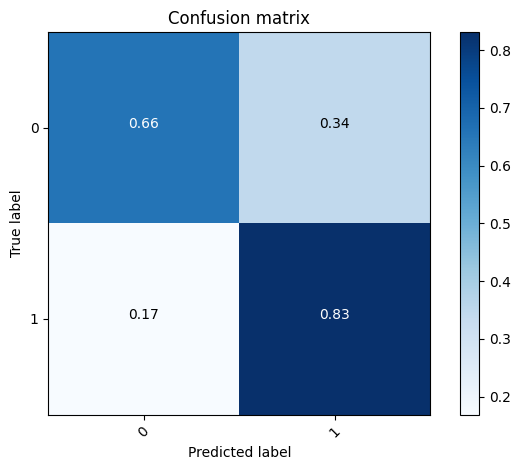

In [63]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(_y_test, _y_predict)
plot_confusion_matrix(cm=cm, classes=['0','1'], normalize=True)

In [64]:
from sklearn.metrics import classification_report

print(classification_report(_y_test,_y_predict,labels=['0','1']))

              precision    recall  f1-score   support

           0       0.85      0.66      0.74        96
           1       0.62      0.83      0.71        65

   micro avg       0.73      0.73      0.73       161
   macro avg       0.74      0.74      0.73       161
weighted avg       0.76      0.73      0.73       161



In [65]:
from keras.layers import SimpleRNN
model2 = Sequential()
model2.add(Embedding(input_dim=vocab_size,
                    output_dim=100,
                    input_length=maxlen))
model2.add(SimpleRNN(32, activation="relu"))
model2.add(Dense(32,activation="relu"))
model2.add(Dense(2,activation="sigmoid"))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'],)
model2.summary()

/Users/sirisuk/anaconda3/envs/nlp_py3.9/lib/python3.9/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [66]:
model2.fit(X_train,y_train)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - categorical_accuracy: 0.4841 - loss: 0.6941


In [67]:
y_predict = model2.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [68]:
model2.evaluate(X_test,y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.5840 - loss: 0.6857 


[0.6849049925804138, 0.590062141418457]

In [69]:
_y_test = [np.argmax(y) for y in y_test]
_y_predict = [np.argmax(yhat) for yhat in y_predict]

Normalized confusion matrix
[[0.98958333 0.01041667]
 [1.         0.        ]]


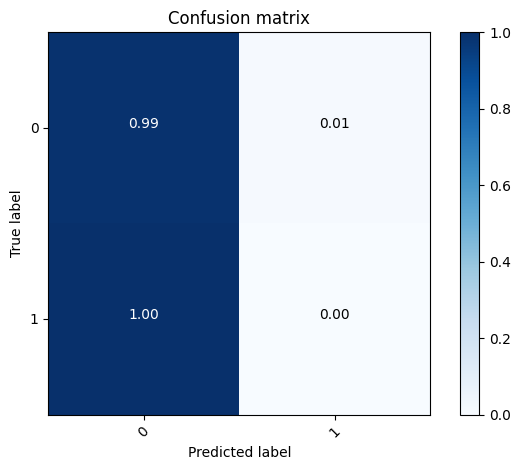

In [70]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(_y_test, _y_predict)
plot_confusion_matrix(cm=cm, classes=['0','1'], normalize=True)

In [71]:
from sklearn.metrics import classification_report

print(classification_report(_y_test,_y_predict,labels=['0','1']))

              precision    recall  f1-score   support

           0       0.59      0.99      0.74        96
           1       0.00      0.00      0.00        65

   micro avg       0.59      0.59      0.59       161
   macro avg       0.30      0.49      0.37       161
weighted avg       0.35      0.59      0.44       161



In [72]:
from keras.layers import LSTM
model3 = Sequential()
model3.add(Embedding(input_dim=vocab_size,
                    output_dim=100,
                    input_length=maxlen))
model3.add(LSTM(32, activation="relu"))
model3.add(Dense(32,activation="relu"))
model3.add(Dense(2,activation="sigmoid"))

model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'],)
model3.summary()


/Users/sirisuk/anaconda3/envs/nlp_py3.9/lib/python3.9/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [73]:
model3.fit(X_train,y_train)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - categorical_accuracy: 0.4787 - loss: 0.6946


In [74]:
y_predict = model3.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [75]:
model3.evaluate(X_test,y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.5867 - loss: 0.6898  


[0.6894431114196777, 0.5962733030319214]

In [76]:
_y_test = [np.argmax(y) for y in y_test]
_y_predict = [np.argmax(yhat) for yhat in y_predict]

Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


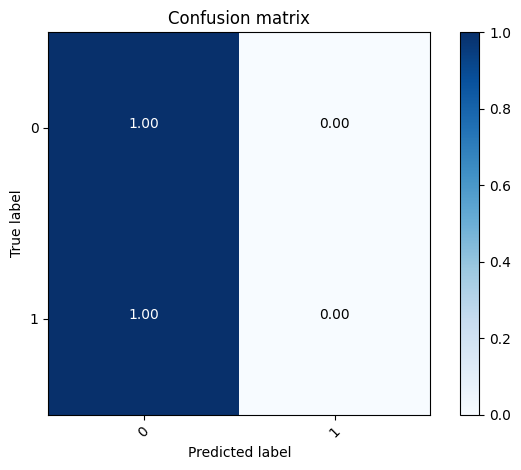

In [77]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(_y_test, _y_predict)
plot_confusion_matrix(cm=cm, classes=['0','1'], normalize=True)

In [78]:
from sklearn.metrics import classification_report

print(classification_report(_y_test,_y_predict,labels=['0','1']))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75        96
           1       0.00      0.00      0.00        65

   micro avg       0.60      0.60      0.60       161
   macro avg       0.30      0.50      0.37       161
weighted avg       0.36      0.60      0.45       161



/Users/sirisuk/anaconda3/envs/nlp_py3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sirisuk/anaconda3/envs/nlp_py3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sirisuk/anaconda3/envs/nlp_py3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

In [79]:
from keras.layers import Bidirectional
model4 = Sequential()
model4.add(Embedding(input_dim=vocab_size,
                    output_dim=100,
                    input_length=maxlen))
model4.add(Bidirectional(LSTM(10,activation="relu")))
model4.add(Dense(32,activation="relu"))
model4.add(Dense(2,activation="sigmoid"))

model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'],)
model4.summary()


/Users/sirisuk/anaconda3/envs/nlp_py3.9/lib/python3.9/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [80]:
model4.fit(X_train,y_train)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - categorical_accuracy: 0.4837 - loss: 0.6797


In [81]:
y_predict = model4.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [82]:
model4.evaluate(X_test,y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.5672 - loss: 0.6604  


[0.6583145260810852, 0.590062141418457]

In [83]:
_y_test = [np.argmax(y) for y in y_test]
_y_predict = [np.argmax(yhat) for yhat in y_predict]

Normalized confusion matrix
[[0.33333333 0.66666667]
 [0.03076923 0.96923077]]


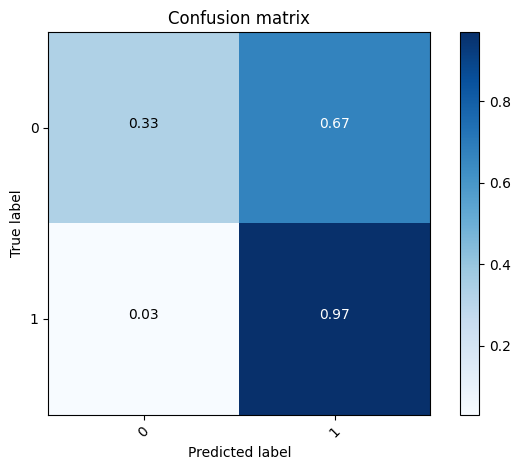

In [84]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(_y_test, _y_predict)
plot_confusion_matrix(cm=cm, classes=['0','1'], normalize=True)

In [85]:
from sklearn.metrics import classification_report

print(classification_report(_y_test,_y_predict,labels=['0','1']))

              precision    recall  f1-score   support

           0       0.94      0.33      0.49        96
           1       0.50      0.97      0.66        65

   micro avg       0.59      0.59      0.59       161
   macro avg       0.72      0.65      0.57       161
weighted avg       0.76      0.59      0.56       161



เปรียบเทียบความแตกต่าง model ดีมากที่สุด LSTM > RNN > Bidirectional > Fully Connected

6610402230 ศิริสุข ทานธรรม